# Filter example - Bessel 1kHz Lowpass

In [1]:
# %load ./header.py
import numpy as np
from scipy import signal
from scipy import linalg
import control
import matplotlib.pyplot as plt

import sys

if '../sdfpy' not in sys.path:
  sys.path.insert(0,'../sdfpy')

import sd_sim
import sdfpy as sdf

OSR = 256      # oversample ratio
fb = 22050     # nyquist
fs = OSR*2*fb  # sampling frequency
ts = 1/fs      # sampling period


## Lowpass Filter - 1kHz

Below is a 4th order Bessel/Thomson analog lowpass filter with critical frequencies at 1kHz.

In [2]:
Wn    = 2*np.pi*1000
ftype = 'lowpass'
N     = 4

[z,p,k]    = signal.bessel(N, Wn, ftype, analog=True, output='zpk')
the_filter = signal.zpk2ss(z, p, k)


%store the_filter

Stored 'the_filter' (tuple)


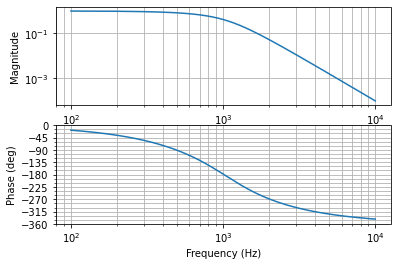

In [3]:
[A,B,C,D] = the_filter
sys = control.ss(A, B, C, D)
out = control.bode_plot(sys, Hz=True)

Here is the Bode plot of the implemented filter.

Goto the next step - [$\Sigma\Delta$ Conversion](./2_sigma_delta_conversion.ipynb)